# **E-Commerce Store Analysis: A Deep Dive into Customer Behavior and Market Trends**
**Contributors**: Alima Abdirova, Gunjan Sharma, Jiacheng Li, Megha Arul Senthilkumar, Oumou Barry, Rajashree Ramaprabhu

# **Executive Summary**

This report seeks to analyze the performance of an e-commerce store through an exploration of website traffic, customer behavior, and products and brands performance. Our observation shows that the E-commerce customers prefer lower-priced products, with peak purchases at 7:00 pm and  often engaging during special sales events and this can be used to drive strategy adjustments, optimizing costs during low night-time activity and capitalizing on peak morning engagement and potential for enhanced night sales through promotions. Most of the E-Commerce customers visits the site only for viewing the site and the products displayed.
E-Commerce customers are more likely to choose brands that are cheaper and affordable.  During our analysis, we observed that some products had a low cart conversion rate, indicating a potential barrier in the buying process. We recommend enhancing product listings with comprehensive details and leveraging social proof, such as highlighting popular products and showcasing real-time user activity, to boost purchase intent. Our analysis underscores the importance of customer experience and product quality for brand success. To enhance performance, the store should focus on improving user experience, addressing quality concerns, and collaborating with popular brands, ensuring sustained appeal and increased sales.



Table of Contents

I. Introduction

II. Data Wrangling and Exploration

A. Data Wrangling

B. Data Exploration

C. Data Cleaning

III. Marketing Application

A. Website Traffic Analysis

B. Customer Behavior Analysis

C.Products, Brands, and Categories Analysis

IV. Conclusions

V. Challenges

VI. References

# I.Introduction

**Business Problem**

The purpose of our business plan is to use data-driven insights to succeed in our medium-sized cosmetics online store. We aim to understand customer behavior, enhance the customer journey, and evaluate product and brand performance. Our motivation lies in the rapid growth of e-commerce, and by leveraging data, we aim to remain competitive and provide an exceptional shopping experience for our customers.

**Motivation:** With the immense growth of E-Commerce over the past few years, customers primarily utilize this platform in order to make potential purchases and ultimately drive business success.

**Data Source**:
 E-Commerce Events History in Cosmetics Shop - Open CDP Project. Direct access [link text](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop?resource=download)

# II. Data Wrangling and Exploration

**A. Data Wrangling and Exploration**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline
from matplotlib import style

In [ ]:
Oct_2019=pd.read_csv('gs://ba780_project_files/BA780_files/2019-Oct.csv')
Nov_2019=pd.read_csv('gs://ba780_project_files/BA780_files/2019-Nov.csv')
Dec_2019=pd.read_csv('gs://ba780_project_files/BA780_files/2019-Dec.csv')
Jan_2020=pd.read_csv('gs://ba780_project_files/BA780_files/2020-Jan.csv')
Feb_2020=pd.read_csv('gs://ba780_project_files/BA780_files/2020-Feb.csv')

We have five datasets that contain information relevant to each respective month. For each dataset, we used the .info() method to provide an overview of its structure. This shows crucial details such as the total number of entries, number of the columns and its names, and the data type associated with each column.

In [ ]:
Oct_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [ ]:
Nov_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [ ]:
Dec_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [ ]:
Jan_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


In [ ]:
Feb_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156682 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 285.4+ MB


We found it reasonable to merge all five tables vertically since they all have the same column names. Then, we performed our first concatenation, combining the five datasets into a larger table and assigning it to a new variable named 'e_commerce'. The merging will assist us with getting a clearer picture of each of the column for the specific month and compare them.

In [ ]:
e_commerce = pd.concat([Oct_2019, Nov_2019,Dec_2019,Jan_2020,Feb_2020], ignore_index=True)

After merging datasets, we again run cosmetics.info() and cosmetics.head() in order to ensure that the datasets combined correctly as well as the data types.

In [ ]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [ ]:
e_commerce.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,month,hour,date_column,day_of_week,category,product
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,10,0,2019-10-01,Tuesday,unfixed,unfixed
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,10,0,2019-10-01,Tuesday,unfixed,unfixed
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,10,0,2019-10-01,Tuesday,unfixed,unfixed
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,10,0,2019-10-01,Tuesday,unfixed,unfixed
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,10,0,2019-10-01,Tuesday,unfixed,unfixed


In [ ]:
e_commerce['category_code'].unique()

array([nan, 'appliances.environment.vacuum', 'stationery.cartrige',
       'apparel.glove', 'accessories.bag',
       'furniture.living_room.cabinet', 'furniture.bathroom.bath',
       'appliances.personal.hair_cutter', 'accessories.cosmetic_bag',
       'appliances.environment.air_conditioner',
       'furniture.living_room.chair', 'sport.diving',
       'appliances.personal.massager'], dtype=object)

**B. Data Exploration**

After Merging dataset, we start to explore the exact information that the dataset is having and try to define all the columns.

In [ ]:
e_commerce.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,month,hour,date_column,day_of_week,category,product
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,10,0,2019-10-01,Tuesday,unfixed,unfixed
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,10,0,2019-10-01,Tuesday,unfixed,unfixed
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,10,0,2019-10-01,Tuesday,unfixed,unfixed
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,10,0,2019-10-01,Tuesday,unfixed,unfixed
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,10,0,2019-10-01,Tuesday,unfixed,unfixed


In [ ]:
e_commerce.shape

(20692840, 9)

In [ ]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


As the information shows above, the combined dataset comprises `20,692,840` records, each representing the record of a customer on the ecommerce website.


The dataset has no missing values except for the `category_code`, `brand`, and `user_session` column. The missing values here indicate that the information realted to them are missing.

There are 9 columns in the dataset, representing the following:

`event_time` is time when event happened at (in UTC)

`event_type` is the kinds of the event, it includes four activities: 'view',
'cart', 'remove_from_cart', 'purchase'

`product_id` is the ID of a product

`category_id` is the product's category ID

`category_code` is the product's category taxonomy (code name) if it was possible
to make it. Usually present for meaningful categories and skipped for different kinds of accessories

`brand` is the downcased string of brand name. It can be missed

`price` is the present float price of a product

`user_id` is the permenant user ID

`user_session` is temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause

**C. Data Cleaning**

Our dataset required heavy cleaning. We had to take several steps to make the data fit the requirements of our analysis.

The first step we took is checking which columns have null values.

In [ ]:
e_commerce.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [ ]:
e_commerce[e_commerce.category_code.isna()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
20692835,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20692836,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20692837,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20692838,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [ ]:
e_commerce['category_code'].fillna('unfixed.unfixed.unfixed',inplace=True)

In [ ]:
e_commerce[e_commerce.brand.isna()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7,2019-10-01 00:00:24 UTC,cart,5825598,1487580009445982239,unfixed.unfixed.unfixed,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25 UTC,cart,5698989,1487580006317032337,unfixed.unfixed.unfixed,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26 UTC,view,5875317,2029082628195353599,unfixed.unfixed.unfixed,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
14,2019-10-01 00:00:32 UTC,remove_from_cart,5779403,1487580013506068678,unfixed.unfixed.unfixed,NaN,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
15,2019-10-01 00:00:33 UTC,remove_from_cart,5779403,1487580013506068678,unfixed.unfixed.unfixed,NaN,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
20692830,2020-02-29 23:59:18 UTC,view,5822298,1487580005595612013,unfixed.unfixed.unfixed,NaN,3.00,607916558,002226f7-7ff3-459f-b941-600c505709ae
20692832,2020-02-29 23:59:25 UTC,view,5899256,2093602042093240877,unfixed.unfixed.unfixed,NaN,5.56,585061704,aa343068-e3b0-47ea-84a9-fce19d4c6314
20692833,2020-02-29 23:59:28 UTC,view,5817692,1487580010872045658,unfixed.unfixed.unfixed,NaN,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d
20692834,2020-02-29 23:59:29 UTC,view,5931426,1487580007675986893,unfixed.unfixed.unfixed,NaN,1.59,468660421,296dc685-4079-445a-a8d3-a93e5e133faf


In [ ]:
e_commerce['brand'].fillna('unknown',inplace=True)

We noticed that the category_code column has a lot of null values and replaced them by a string 'unfixed'.
We did the same thing with the brand column by replacing missing brands by 'unknown'.

In [ ]:
e_commerce.event_time=e_commerce.event_time.str.replace('UTC','')
e_commerce.event_time=pd.to_datetime(e_commerce.event_time)
e_commerce['month']=e_commerce.event_time.dt.month
e_commerce['hour']=e_commerce.event_time.dt.hour
e_commerce['date_column'] = e_commerce['event_time'].dt.date
e_commerce['day_of_week'] = e_commerce['event_time'].dt.day_name()


Then, we decided to split the date column by day, month, year and time to make our future analyses easier.


In [ ]:
e_commerce.category_code.unique()
e_commerce[['category', 'category2','product']] = e_commerce['category_code'].str.split('.', expand=True)
e_commerce.loc[e_commerce['product'].isna(),'product']=e_commerce['category2']
del e_commerce['category2']

In [ ]:
del e_commerce['category_code']

We followed a similar approach to split the category column by category and product for our analysis of product and categories. We split it by primary category, secondary category and product.Then, we dropped the secondary category which was often redundant with the first one and the category_code column because it no longer serves the purpose of our analysis.


In [ ]:
del e_commerce['user_session']

Finally, we decided to delete the user_session column as we won't use it in our analyses.

In [ ]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   event_time   datetime64[ns]
 1   event_type   object        
 2   product_id   int64         
 3   category_id  int64         
 4   brand        object        
 5   price        float64       
 6   user_id      int64         
 7   month        int32         
 8   hour         int32         
 9   date_column  object        
 10  day_of_week  object        
 11  category     object        
 12  product      object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(6)
memory usage: 1.9+ GB


# III. Marketing Application

**A. Website Traffic Analysis**

__Question A1:__  What is the relationship between the total price of orders and the count of orders for different event types over time?

In [ ]:
# Calculating the total revenue from each type of event
top_time = e_commerce[['event_type','price']].groupby(['event_type'])['price'].sum().to_frame('total_price').reset_index()
# Which events are driving the most sales and where the company is generating the most revenue
top_time_count = e_commerce[['event_type','price']].groupby(['event_type'])['event_type'].count().to_frame('count').reset_index()

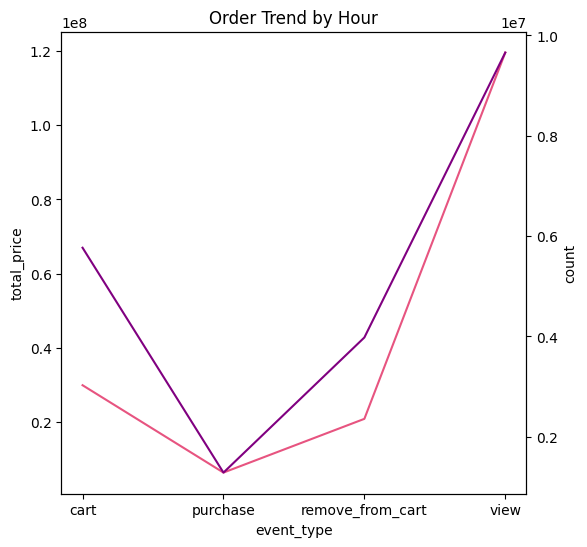

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(x="event_type", y="total_price", data=top_time,ax=ax,c="#E75480")
ax2=ax.twinx()
sns.lineplot(x="event_type", y="count", data=top_time_count,ax=ax2,c='purple')

plt.xticks(rotation=90)
plt.title('Order Trend by Hour')

plt.show()

__Answer A1:__ We can see from that when more customers make purchases, our
earnings increase, indicating a direct link between customer activity and revenue. Additionally, it allows us to compare different types of sales, revealing which contributes most significantly to our income. The graph also highlights periods of heightened and reduced activity, helping us identify when people tend to shop the most. Furthermore, any sudden and significant deviations from the usual trends prompt further investigation to understand what might have caused these anomalies.
The pink line corresponds to the total price, while the purple line corresponds to the event count. When the pink line is at its peak, it signifies that a specific event type, such that purchase, generated the highest possible revenue, which is 1.0. On the other hand, when the purple line reaches its peak, it indicates that a substantial number of events of that particular type, such as purchases, have occurred, also reaching a maximum value of 1.0.


__Question A2:__  What are the customer engagement patterns on the website ?




/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


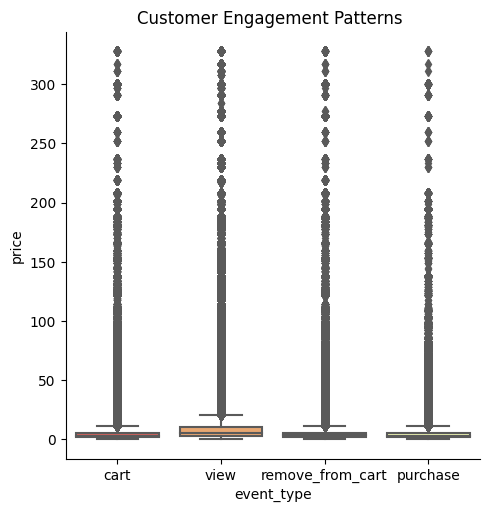

In [ ]:
custom_palette = sns.color_palette("Spectral")
e_commerce1= e_commerce[e_commerce['price']>=0]
sns.catplot(x='event_type',y='price',kind='box', palette=custom_palette, data=e_commerce1)
plt.title('Customer Engagement Patterns ');

**Answer A2:** The graph provides insights into customer engagement patterns on the website concerning product prices and event types, utilizing a box plot. It illustrates that a significant number of activities occur during events when product prices are low. The box plot displays numerous outliers due to the wide range of prices at which events occur with increasing product prices. Notably, the box plot's minimum and maximum prices commence and terminate under the product price of 50, and activities beyond this range are identified as outliers.
Furthermore, an observation can be made regarding the interquartile range in the box plot for the 'view' event, which is notably larger compared to the interquartile ranges of other events.

__Question A3:__   What is the purchase trend of the website across the 5 months?

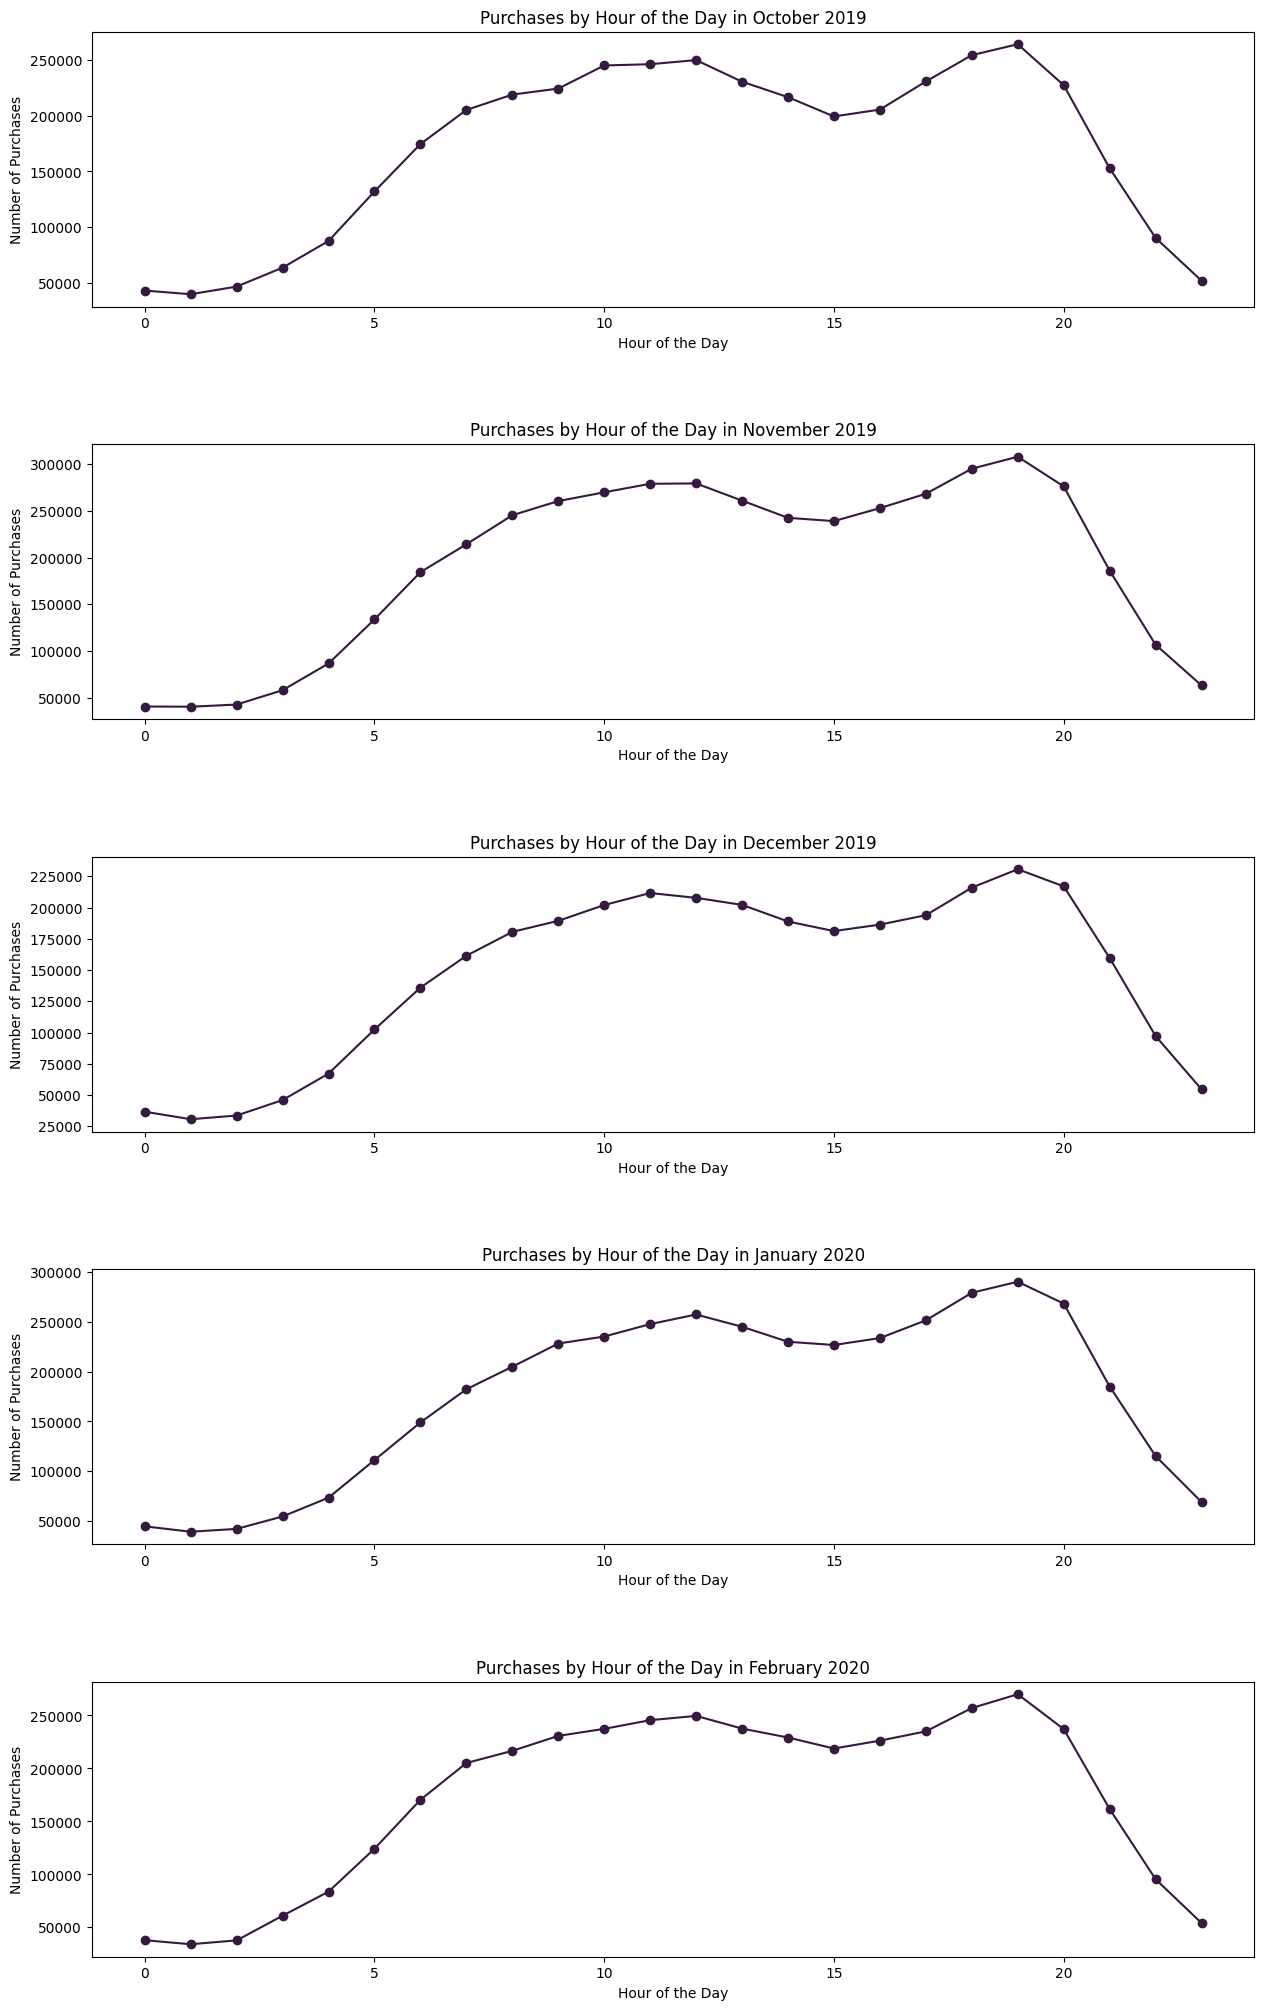

In [ ]:
sns.set_palette("rocket")
months = e_commerce['month'].unique()
fig1, axs1 = plt.subplots(len(months), 1, figsize=(15, 25))
months_label=['October 2019', 'November 2019', 'December 2019', 'January 2020', 'February 2020']

# Month-wise plot, showcasing hourly purchase trends to identify peak transaction times
for i, month in enumerate(months):
    monthly_data = e_commerce[e_commerce['month'] == month]
    e_commerce_by_hour = monthly_data.groupby('hour')['event_type'].count()
    axs1[i].plot(e_commerce_by_hour.index, e_commerce_by_hour.values, marker='o', linestyle='-')
    axs1[i].set_title(f'Purchases by Hour of the Day in {months_label[i]}')
    axs1[i].set_xlabel('Hour of the Day')
    axs1[i].set_ylabel('Number of Purchases')

#Adjusting the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()

**Answer A3:**  Examining the depicted chart, it's evident that the purchase trends across the five months share similarities, yet a closer inspection reveals distinct purchase numbers for each hour on a monthly basis. Broadly, the graph illustrates a lower purchase frequency between 12:00 AM to 05:00 AM, followed by a consistent increase from 5:00 AM to 12:00 PM. Subsequently, there are fluctuations in purchase frequency until a decline around after 7:00 PM. This analysis serves to elucidate two key aspects: the variations in purchase frequencies across hours for each month and the differing purchase trends across the months.

GenAI (ChatGPT) was used to customize the title for each graph and to adjust the spacing between the subplots.



__Question A4:__ During which time periods of the day does the website observe its peak and slack in revenue?

In [ ]:
import plotly.express as px
# Summing hourly revenue from purchases
bubble_data = e_commerce[e_commerce['event_type'] == 'purchase'].groupby('hour')['price'].sum()
fig = px.scatter(bubble_data.reset_index(), x="hour", y="price", size="price", color="price", title='Hourly Revenue')
fig.update_xaxes(title_text='Hour of the day')
fig.update_yaxes(title_text='Revenue')
fig.update_layout(coloraxis_colorbar=dict(title='Revenue'))
fig.show()

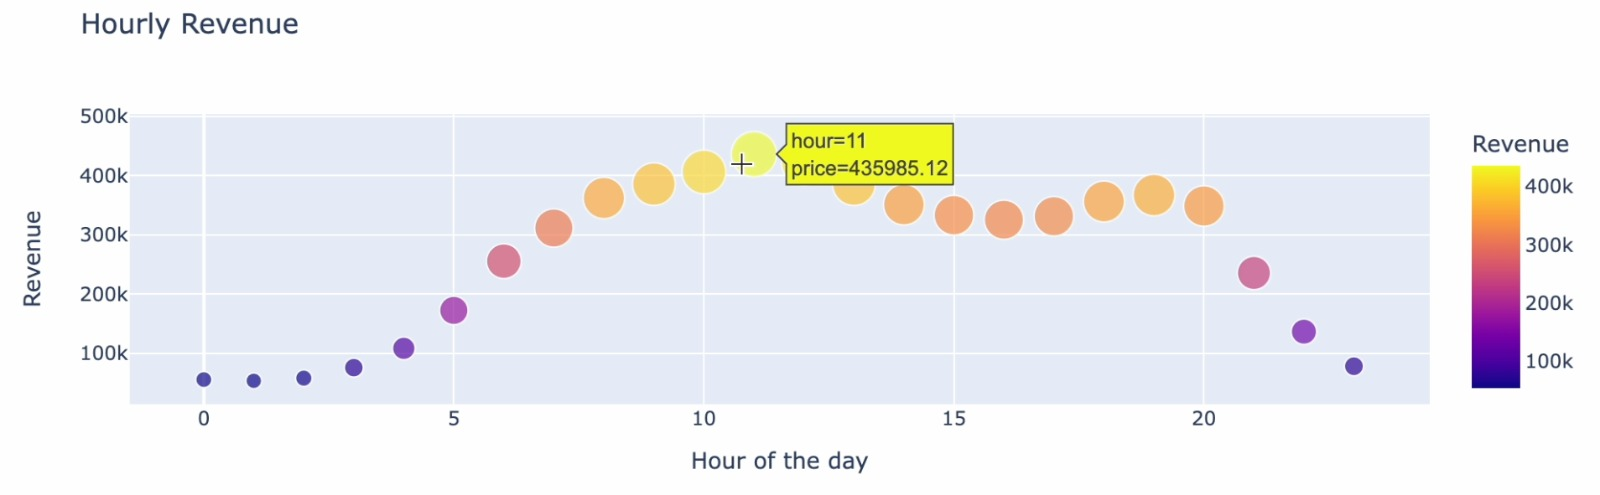

**Answer A4:** The depicted graph illustrates varying revenue levels generated by the website across different hours of the day for 5 months together. This helps in pinpointing both the peak and slack periods during the day. Notably, the revenue peaks during late morning, while reaching its lowest point at midnight. Utilizing this data, strategies can be derived to boost sales during off-peak hours and streamline operations during peak hours.

GenAI (ChatGPT) was used to generate the label for the colorbar.


__Question A5:__ Do purchase patterns vary between regular days and special sales events?

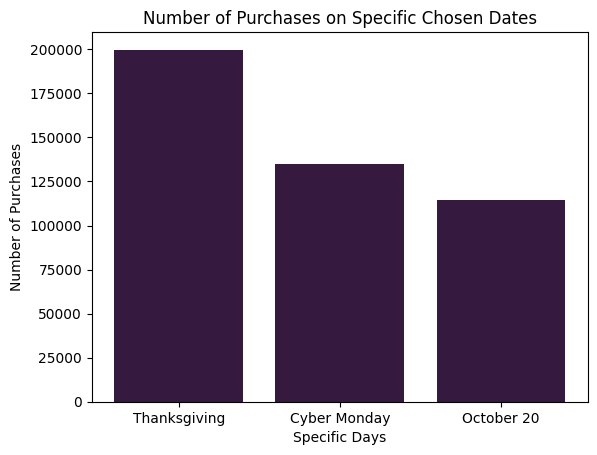

In [ ]:
e_commerce['event_time'] = pd.to_datetime(e_commerce['event_time'])
e_commerce['date_column'] = e_commerce['event_time'].dt.date

thanksgiving_data = e_commerce[e_commerce['date_column'] == pd.to_datetime('2019-11-23').date()]
cyber_monday_data = e_commerce[e_commerce['date_column'] == pd.to_datetime('2019-12-02').date()]

# Selecting data from a randomly chosen date, '2019-10-20'
october_20_data = e_commerce[e_commerce['date_column'] == pd.to_datetime('2019-10-20').date()]

# Counting the number of events
thanksgiving_purchases = thanksgiving_data['event_type'].count()
cyber_monday_purchases = cyber_monday_data['event_type'].count()
october_20_purchases = october_20_data['event_type'].count()

dates = ['Thanksgiving', 'Cyber Monday', 'October 20']
plt.bar(dates, [thanksgiving_purchases, cyber_monday_purchases, october_20_purchases])
plt.title('Number of Purchases on Specific Chosen Dates')
plt.xlabel('Specific Days')
plt.ylabel('Number of Purchases')
plt.show()

**Answer A5:** The presented graph illustrates purchase patterns on three specific dates. Thanksgiving, renowned for significant sales, notably displays a higher purchase frequency compared to an average day. Additionally, Cyber Monday, known for its substantial online discounts, exhibits a noticeable increase in purchase frequency, although less than that of Thanksgiving. This suggests that Thanksgiving experiences superior sales compared to Cyber Monday and special sales days in general experience superior sales compared to normal days.


**B. Customer Behavior Analysis**

**Question B1:** What is the typical behavior of each individual customer in the e-commerce site?

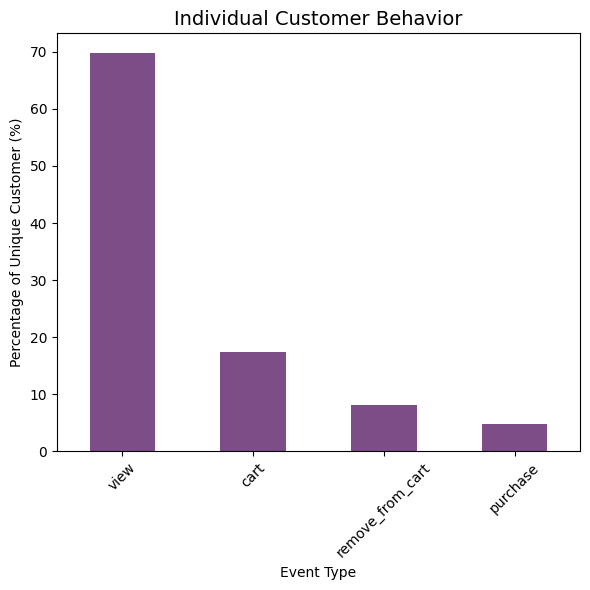

In [ ]:
#Data Preparation
unique_user_counts = e_commerce.drop_duplicates(subset=['user_id', 'event_type'])
event_counts = unique_user_counts['event_type'].value_counts()
total_unique_users = len(unique_user_counts)
percentage_data = (event_counts / total_unique_users) * 100

#Data Visualization
fig, ax = plt.subplots(figsize=(6, 6))
percentage_data.plot(kind='bar', ax=ax,colormap='viridis',alpha=0.7)

#Plot Settings
ax.set_xlabel('Event Type')
ax.set_ylabel('Percentage of Unique Customer (%)')
ax.set_title('Individual Customer Behavior', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Answer B1:** We are identifying each user based on their unique ID and collecting their behavior data by tracking their interactions on the e-commerce site. The graph the typical behavior of our customers based on their unique IDs. Approximately seventy percent of our customers primarily visit our site to browse and view products. Around twenty percent engage by adding items to their cart, while approximately ten percent visit to remove items from their cart. A little over five percent of our visitors complete a purchase on our site. This graph provides a percentage breakdown of customer behaviors, all attributed to their unique IDs.

GenAI (ChatGPT) was used to generate the purples and pinks color palette.
Gen AI (ChatGPT) was used for the ‘unstack()’ method to transform the grouped series of user id and event type with multi-index into one DataFrame 'event_counts' and then filled the missing values with zeros using ‘fill_value=0’ argument

**Question B2:** What is the purpose of top 10 frequently visiting customer in the site?

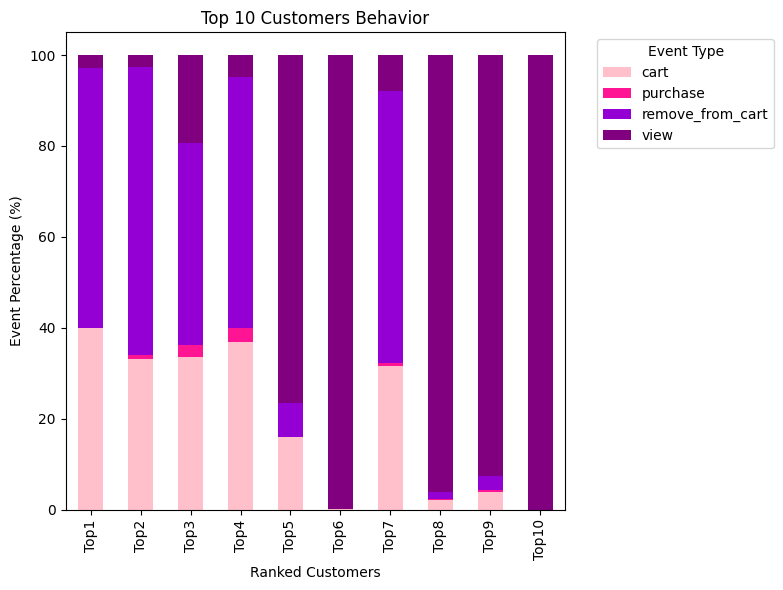

In [ ]:
#Get Data for top 10 customers with the most actions
top_10_customers = e_commerce['user_id'].value_counts().nlargest(10).index
top_10_data = e_commerce[e_commerce['user_id'].isin(top_10_customers)]
event_counts = top_10_data.groupby(['user_id', 'event_type']).size().unstack(fill_value=0)
total_actions = event_counts.sum(axis=1)
percentage_data = event_counts.divide(total_actions, axis=0) * 100
custom_cmap = plt.cm.colors.ListedColormap(['#FFC0CB', '#FF69B4', '#FF1493', '#C71585', '#9400D3', '#800080'])

#Calculation and Visualize event percentages
fig, ax = plt.subplots(figsize=(8, 6))
percentage_data.plot(kind='bar', stacked=True, ax=ax,colormap=custom_cmap)

#Set Labels and Legend for the plot
ax.set_xticklabels(['Top' + str(i + 1) for i in range(10)])
ax.set_xlabel('Ranked Customers')
ax.set_ylabel('Event Percentage (%)')
ax.set_title('Top 10 Customers Behavior')
ax.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Answer B2:** We are identifying the top 10 frequent visitors of the e-commerce site and tracking their activity in the site. This process enables us to gain insights into the purchasing behavior of these customers, to implement strategies for a more personalized shopping experience. The graph showcases the behavior of our top customers. The top-ranked customer visits our e-commerce site forty percent of the time to add items to their cart. In contrast, they visit nearly sixty percent of the time to remove items from their cart. As for the tenth-ranked customer, they utilize our site almost exclusively for product browsing, with nearly 100 percent of their visits dedicated to viewing products.

GenAI (ChatGPT) was used to generate the purples and pinks color palette.
Gen AI (ChatGPT) was used for the ‘unstack()’ method to transform the grouped series of user id and event type with multi-index into one DataFrame 'event_counts' and then filled the missing values with zeros using ‘fill_value=0’ argument

**Question B3:** What are the top 10 favorite brands of the top 10 frequent visiting customers of the site?

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import HoverTool
from math import pi
import pandas as pd

#Select top 10 customers with most actions
top_10_customers = e_commerce['user_id'].value_counts().nlargest(10).index
top_10_data = e_commerce[e_commerce['user_id'].isin(top_10_customers)]

#Count and Prepare data for top 10 brands
brand_counts = top_10_data[top_10_data['brand'] != 'unknown']['brand'].value_counts().nlargest(10)
brand_counts = brand_counts.reset_index(name='value').rename(columns={'index': 'brand'})

#Calculate angles and assign for the pie chart
brand_counts['angle'] = brand_counts['value'] / brand_counts['value'].sum() * 2 * pi
brand_counts['color'] = ['#FF5733', '#FFAB33', '#FFC733', '#AFFF33', '#33FF57', '#33FFC4', '#33F1FF', '#336BFF', '#7333FF', '#D933FF']

#Create the pir chart
p = figure(height=400, width=800, title='Top 10 Brands chosen by Top 10 Customers', toolbar_location=None,
           tools="hover", tooltips="@brand: @value", x_range=(-0.5, 1.0))
p.wedge(x=0, y=1, radius=0.3,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='brand', source=brand_counts)
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
output_notebook()
show(p)

Loading BokehJS ...

**Answer B3:** We are identifying top 10 frequent visiting customer’s inclination towards a particular brand which could be one of the reasons they are most often visiting the site. This will help us to increase the brand collaboration more on the site and this particular brand could add revenue generating values to the site. From the graph, we could see the top 10 most accessed brands by the customers. The top 10 brands is calculated by grouping all of the events done by the top 10 customers together. The brand “trind” is the top brand that is most loved by the customers and it has a customer visit count of 7564. “Jessnail” is the least brand loved by customers from the top 10 list and has a visit count of 605.

Gen AI(Chat GPT) was used to generate the color palette of the pie chart.

**Question B4:** What is the percentage of customer's event towards their favorite brand?

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import dodge
from bokeh.palettes import Spectral11
import pandas as pd

#Filter data for the most frequent brand
filtered_data = e_commerce[e_commerce['brand'] != 'unknown']
most_frequent_brand = filtered_data['brand'].mode().iloc[0]
filtered_data = filtered_data[filtered_data['brand'] == most_frequent_brand]

#Count and calculate event percentages
event_counts = filtered_data['event_type'].value_counts().reset_index()
event_counts.columns = ['event_type', 'count']
total_count = event_counts['count'].sum()
event_counts['percentage'] = (event_counts['count'] / total_count) * 100

#Create the chart
source = ColumnDataSource(event_counts)
p = figure(x_range=event_counts['event_type'], height=350, title=f'Events Recorded for most purchased brand {most_frequent_brand}')
bar = p.vbar(x='event_type', top='percentage', source=source, width=0.7, color='orange', legend_label='Event Type')
tooltips = [
    ("Event Type", "@event_type"),
    ("Percentage", "@percentage{0.2f}%"),
]
hover = HoverTool(renderers=[bar], tooltips=tooltips)
p.add_tools(hover)
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = 'Percentage (%)'
p.xaxis.major_label_orientation = 0
p.xaxis.major_label_standoff = 12
output_notebook()
show(p)

Loading BokehJS ...

**Answer B4:** We are figuring out behavior of the customers towards their favorite brand. We have taken the brand “runail” for this case as it has the high purchase ratio in the e-commerce site. The graph illustrates the different type of activities customers have done against this brand in the X-axis. Y-axis represents the percentage of customers. The graph demonstrates forty percent of the customers view the brand. Amongst the thiry percent of the customer adding the brand to the cart, only six percent of the customer purchase from the brand.

**Question B5:** What is the reason behind customer's inclination towards their favorite brand?

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.models import NumeralTickFormatter  # Import NumeralTickFormatter
import pandas as pd

#Filter data for the most purchased brand
filtered_data = e_commerce[e_commerce['brand'] != 'unknown']
most_purchase_brand = filtered_data[filtered_data['event_type'] == 'purchase']['brand'].mode().iloc[0]
filtered_data = filtered_data[filtered_data['brand'] == most_purchase_brand]

#Define price ranges and calculate counts and percentages
price_ranges = [(0, 50), (50, 100), (100, 150)]
price_counts = [0] * len(price_ranges)
for i, (start, end) in enumerate(price_ranges):
    price_counts[i] = filtered_data[(filtered_data['price'] >= start) & (filtered_data['price'] < end)]['user_id'].count()
total_purchase = sum(price_counts)
percentages = [count / total_purchase * 100 for count in price_counts]

#Create the chart to visualize
source = ColumnDataSource(data=dict(price_ranges=[f'${start}-{end}' for start, end in price_ranges], purchase=price_counts, percentage=percentages))
p = figure(x_range=[f'${start}-{end}' for start, end in price_ranges], height=400, width=800, title=f'Pricing Strategy Analysis for {most_purchase_brand}', tools="hover")
p.varea_stack(stackers=['purchase'], x='price_ranges', source=source, fill_color=["purple"], fill_alpha=0.6, legend_label="Purchase")
p.yaxis.axis_label = 'Purchase Count'
p.xaxis.axis_label = 'Price Range'

#Add hover to format
hover = HoverTool()
hover.tooltips = [("Price Range", "@price_ranges"), ("Purchase", "@purchase"), ("Percentage", "@percentage{0.2f}%")]
p.add_tools(hover)
p.yaxis.formatter = NumeralTickFormatter(format="0,0")  # Format as a regular number
output_notebook()
show(p)

Loading BokehJS ...

**Answer B5:** As we have previously seen top 10 customer’s favorite brands and the events they do towards the brand, now it is essential to find out the reason behind the brand’s performance amongst customers. We have taken price strategy as our consideration to check if customers are inclined towards the brand because of its pricing system. We have taken the highly purchased brand amongst the customers. As we can see from the graph, “runail” is the most frequently purchased top brand among customers. Most of the products from “runail” falls under the price range of “0-50” and we can see how the slope is going down as the price range is increasing. From the graph, it is evident that customers are choosing runail over any other brand for their purchase because of their low price strategy. Most customers are attracted to lower costed products and tend to purchase it. As we hover over the graph, we can see other details such as the price range, purchase count and percentage of purchases by customers.


Gen AI(ChatGPT) was used to generate the string formatting used in the ColumnDataSource function.







**C. Products, Brands, and Categories**

**Question C1:** What are the top 10 most purchased brands each month?


In [ ]:
#aggregate top 10 purchased brands by months
monthly_purchased_brands=e_commerce[(e_commerce['event_type'] == 'purchase') & (e_commerce['brand']!='unknown')].groupby(['brand','month'])['event_type'].count().reset_index().sort_values(by='event_type', ascending=False)
monthly_purchased_brands.rename(columns = {'event_type':'Purchases'}, inplace = True)
monthly_purchased_brands.rename(columns = {'brand':'Brands'}, inplace = True)
monthly_purchased_brands.rename(columns = {'month':'Months'}, inplace = True)
monthly_purchased_brands
top_brands=(monthly_purchased_brands
                       .groupby('Months', group_keys=False)
                       .apply(lambda x: x.nlargest(10, 'Purchases')))

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3201: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/tmp/ipykernel_59626/2468166297.py:12: UserWarning:

The figure layout has changed to tight



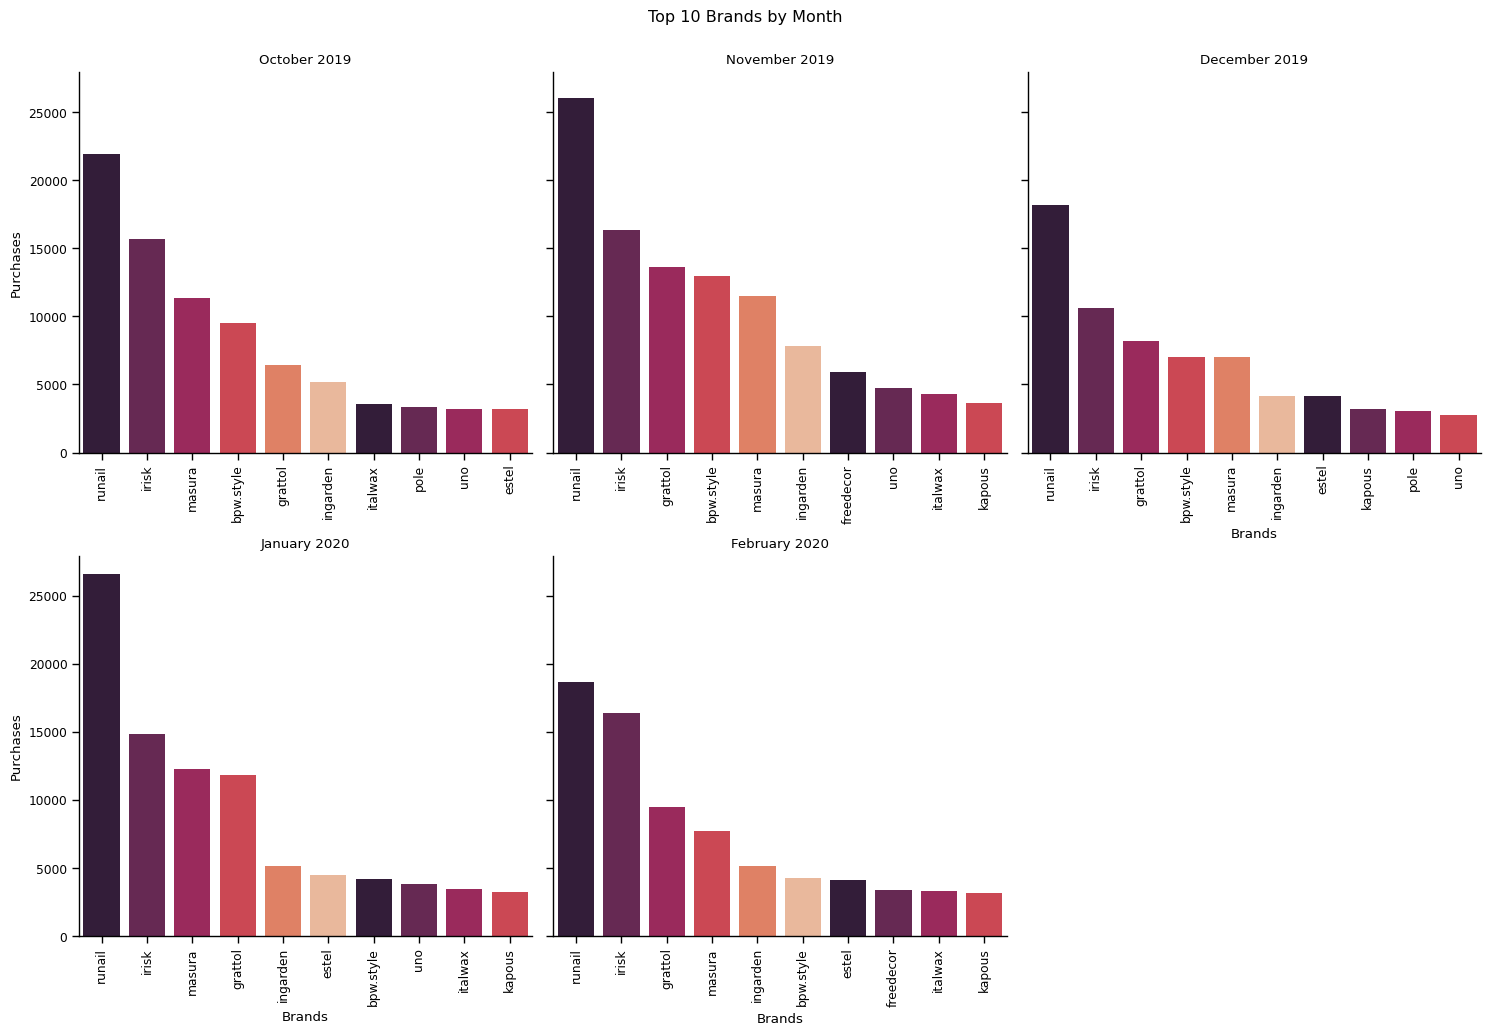

In [ ]:
#Set the color palette
custom_palette = sns.color_palette("rocket")
sns.set_context('paper')

#Create bar graphs
g = sns.catplot(data=top_brands, col='Months', kind='bar', x='Brands',
                y='Purchases', col_order=[10, 11, 12, 1, 2], col_wrap=3,
                palette=custom_palette, sharex=False)

#Create custom titles for subplots
titles = ['October 2019', 'November 2019', 'December 2019', 'January 2020', 'February 2020']
for i, ax in enumerate(g.axes.flat):
    ax.set_title(titles[i])
    ax.tick_params(axis='x', rotation=90)

g.fig.tight_layout()
g.fig.suptitle("Top 10 Brands by Month", y=1.03)
plt.show();

**Answer C1:** The bar graphs display the most purchased brands each month from October 2019 to February 2020. Across all 5 months, the most purchased brand is Runail. Runail, Irisk, Grattol, Masura, and BPW-Style are the most purchased brands during the five months shown on the bar graph.The other brands with consistent sales from October to February include Ingarden, Estel, and Uno.

Gen AI (ChatGPT) was used for the function that selects the top 10 brands and generating the loop that sets the titles for subplots in the graph.

**Question C2:** What is the monthly frequency of purchases for each product?


In [ ]:
#aggregate top 10 purchased products by months
monthly_purchased_products=e_commerce[(e_commerce['event_type'] == 'purchase') & (e_commerce['product']!='unfixed')].groupby(['product','month'])['event_type'].count().reset_index().sort_values(by='event_type', ascending=False)
monthly_purchased_products.rename(columns = {'event_type':'Purchases'}, inplace = True)
monthly_purchased_products.rename(columns = {'product':'Products'}, inplace = True)
monthly_purchased_products.rename(columns = {'month':'Months'}, inplace = True)
monthly_purchased_products.head(2)

,Products,Months,Purchases
23,cartrige,11,1548
22,cartrige,10,1402


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3201: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/tmp/ipykernel_59626/1575303217.py:16: UserWarning:

The figure layout has changed to tight



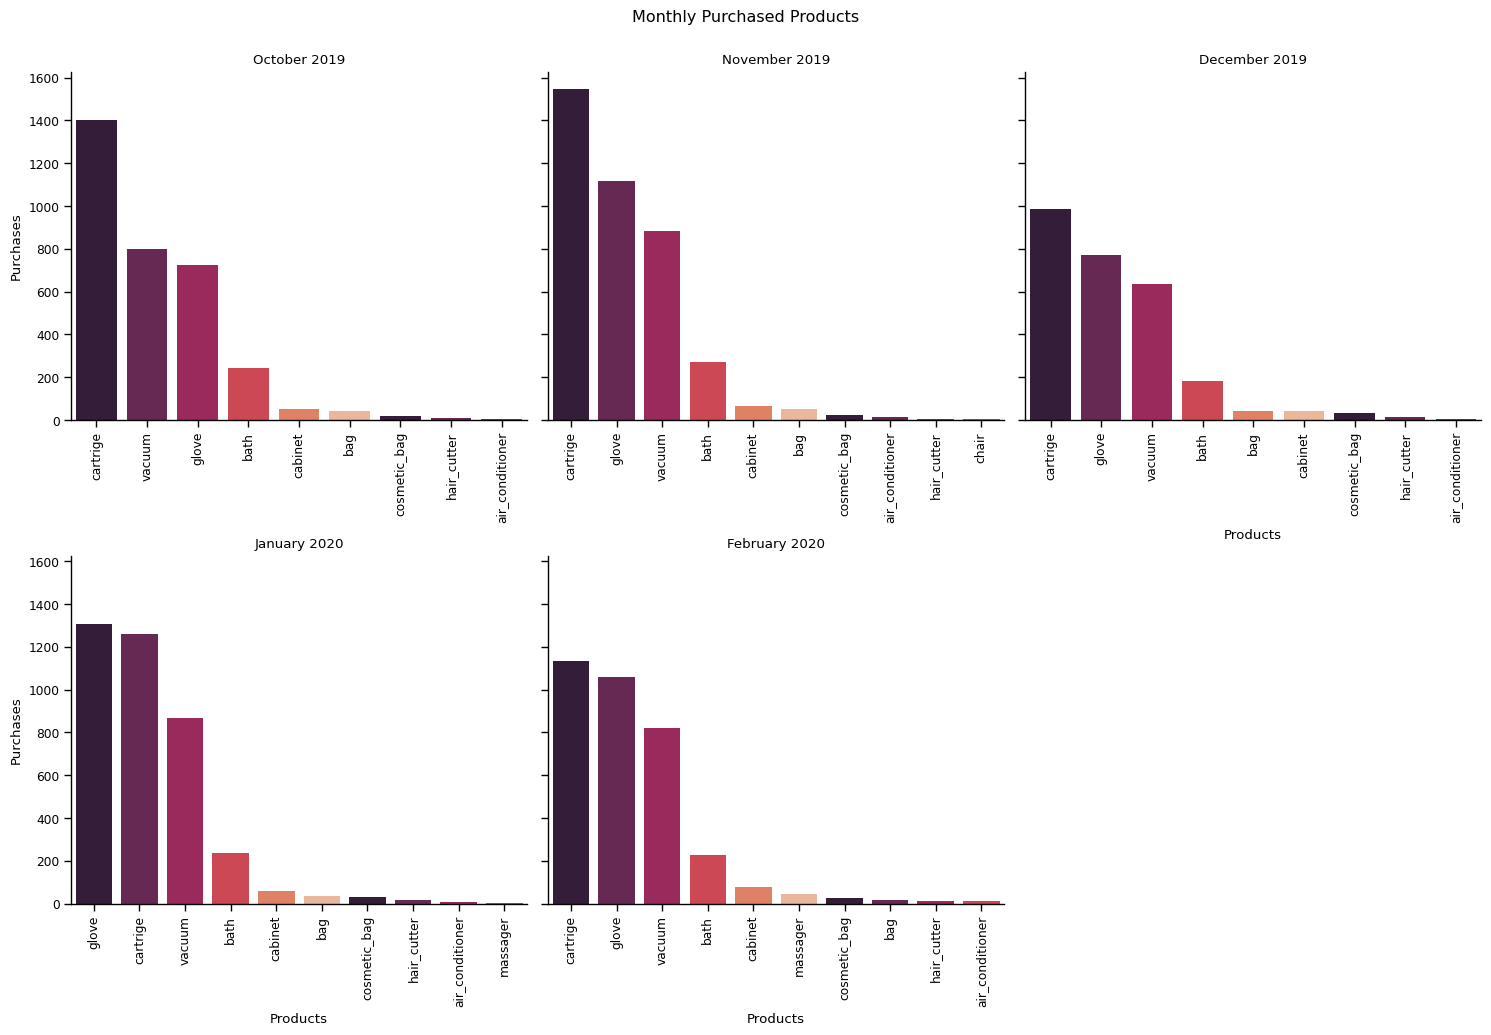

In [ ]:
#Set the color palette
custom_palette = sns.color_palette("rocket")
sns.set_context('paper')

#Create bar graphs
g = sns.catplot(data=monthly_purchased_products, col='Months', kind='bar', x='Products',
                y='Purchases', col_order=[10, 11, 12, 1, 2], col_wrap=3,
                palette=custom_palette, sharex=False)

#Create custom titles for subplots
titles = ['October 2019', 'November 2019', 'December 2019', 'January 2020', 'February 2020']
for i, ax in enumerate(g.axes.flat):
    ax.set_title(titles[i])
    ax.tick_params(axis='x', rotation=90)

g.fig.tight_layout()
g.fig.suptitle("Monthly Purchased Products", y=1.03)
plt.show();

**Answer C2:** The provided bar graphs provide the information on monthly purchases of various products from October 2019 to February 2020. Throughout this period, the charts clearly show that the top 3 products throughout the period were cartridges, gloves and vacuums. We can also observe how customers had strong preference toward the “cartridge" products since it consistently dominated sales and maintained the highest purchase rate every month except January. As mentioned before, the products like glove, vacuum, and bath often followed "cartridge" in terms of the number of purchases and maintain strong sales, especially in months like December, January, and February. On the other hand, items such as "bag", "massager", "cosmetic-bag", "hair-cutter", and "air-conditioner" showed lower sales across these months, indicating less demand for them compared to the top-performing products.

Gen AI (ChatGPT) was used for generating the loop that sets the titles for subplots in the graph.

**Question C3:**  What is the average price of the most and least purchased brands/products?


In [ ]:
#Aggregate top 3 purchased products
top_3_products = e_commerce[
    (e_commerce['event_type'] == 'purchase') &
    (e_commerce['product'] != 'unfixed')
].groupby('product').agg(
    num_purchases=pd.NamedAgg(column='event_type', aggfunc='count'),
    average_price=pd.NamedAgg(column='price', aggfunc='mean')
).sort_values(by='num_purchases', ascending=False).head(3).reset_index()

print(top_3_products)

    product  num_purchases  average_price
0  cartrige           6327       2.229662
1     glove           4977       6.899859
2    vacuum           4000      34.655993


In [ ]:
#Aggregate bottom 3 purchased products
bottom_3_products = e_commerce[
    (e_commerce['event_type'] == 'purchase') &
    (e_commerce['product'] != 'unfixed')
].groupby('product').agg(
    num_purchases=pd.NamedAgg(column='event_type', aggfunc='count'),
    average_price=pd.NamedAgg(column='price', aggfunc='mean')
).sort_values(by='num_purchases', ascending=True).head(3).reset_index()

print(bottom_3_products)

           product  num_purchases  average_price
0            chair              3     121.480000
1  air_conditioner             36       8.481111
2         massager             44      45.728409


In [ ]:
#Aggregate top 3 purchased brands
top_3_brands = e_commerce[
    (e_commerce['event_type'] == 'purchase') &
    (e_commerce['brand'] != 'unknown')
].groupby('brand').agg(
    num_purchases=pd.NamedAgg(column='event_type', aggfunc='count'),
    average_price=pd.NamedAgg(column='price', aggfunc='mean')
).sort_values(by='num_purchases', ascending=False).head(3).reset_index()

print(top_3_brands)

    brand  num_purchases  average_price
0  runail         111408       3.082662
1   irisk          73806       3.033674
2  masura          49751       2.809287


In [ ]:
#Aggregate bottom 3 purchased brands
bottom_3_brands = e_commerce[
    (e_commerce['event_type'] == 'purchase') &
    (e_commerce['brand'] != 'unknown')
].groupby('brand').agg(
    num_purchases=pd.NamedAgg(column='event_type', aggfunc='count'),
    average_price=pd.NamedAgg(column='price', aggfunc='mean')
).sort_values(by='num_purchases', ascending=True).head(3).reset_index()

print(bottom_3_brands)

        brand  num_purchases  average_price
0       rorec              1           1.40
1  helloganic              1           3.10
2     lunaris              1          16.19


In [ ]:
from bokeh.models import CustomJS, FactorRange, HoverTool, ColumnDataSource, Select
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column

#Create Tooltips
TOOLTIPS = [("Average Price", "@average_price")]

#Define function to create figure
def create_figure(data, title, x_column='product'): #Chatgpt
    source = ColumnDataSource(data=data)
    p = figure(x_range=data[x_column], height=350, y_axis_label="average price",
               title='Average Price of Top/Bottom Products and Brands', toolbar_location=None, tooltips=TOOLTIPS)
    p.vbar(x=x_column, width=0.5, bottom=0, top='average_price', color='purple', source=source)
    return p

#Creating the plots
top_products_plot = create_figure(top_3_products, "Top 3 Products")
bottom_products_plot = create_figure(bottom_3_products, "Bottom 3 Products")
top_brands_plot = create_figure(top_3_brands, "Top 3 Brands", x_column='brand')
bottom_brands_plot = create_figure(bottom_3_brands, "Bottom 3 Brands", x_column='brand')

#Creating dictionary for the plots
plots = {
    'Top 3 Products': top_products_plot,
    'Bottom 3 Products': bottom_products_plot,
    'Top 3 Brands': top_brands_plot,
    'Bottom 3 Brands': bottom_brands_plot
}

menu = Select(options=list(plots.keys()), value='Top 3 Products', title='Select Plot')

# JavaScript code to change the plot based on the dropdown value #Chatgpt for Java
callback_code = """
    var f = cb_obj.value;
    if (f == 'Top 3 Products') {
        plots['Top 3 Products'].visible = true;
        plots['Bottom 3 Products'].visible = false;
        plots['Top 3 Brands'].visible = false;
        plots['Bottom 3 Brands'].visible = false;
    } else if (f == 'Bottom 3 Products') {
        plots['Top 3 Products'].visible = false;
        plots['Bottom 3 Products'].visible = true;
        plots['Top 3 Brands'].visible = false;
        plots['Bottom 3 Brands'].visible = false;
    } else if (f == 'Top 3 Brands') {
        plots['Top 3 Products'].visible = false;
        plots['Bottom 3 Products'].visible = false;
        plots['Top 3 Brands'].visible = true;
        plots['Bottom 3 Brands'].visible = false;
    } else if (f == 'Bottom 3 Brands') {
        plots['Top 3 Products'].visible = false;
        plots['Bottom 3 Products'].visible = false;
        plots['Top 3 Brands'].visible = false;
        plots['Bottom 3 Brands'].visible = true;
    }
"""

menu.js_on_change('value', CustomJS(args={'plots': plots}, code=callback_code))

# Initially make only the first plot visible
for key, plot in plots.items(): #Chatgpt
    if key != 'Top 3 Products':
        plot.visible = False

layout = column(menu, *plots.values())

output_notebook()
show(layout)


Loading BokehJS ...

**Answer C3:** The average price ranges for the most and least purchased brands respectively are about 2-3 USD and 1-16 USD. The second price range is quite a surprising finding as one would expect relatively cheap brands to be purchased. However, Rorec and Helloganic were among the least purchased brands despite being inexpensive(1 USD and 3 USD respectively). A potential explanation could be the quality of the products within those brands. This is an important observation that may require further digging by looking at customer reviews for those brands. On the other hand, the low price range of the top 3 brands makes sense as one would expect such behavior. Nonetheless, it is important to note that those are nail polish brands which explains their low cost. This may indicate that the store should follow a low-cost pricing strategy to increase its sales.

The average price for the top 3 and bottom 3 products was fluctuating. For the top products, among the three products, the cartridge has the lowest average price, sitting at just 2.23 USD. This suggests that cartridges are relatively affordable compared to the other two products.  In comparison, the vacuum stands out as the most expensive among the three products, with an average price of 34.56 USD. Its price is almost five times that of the glove and over fifteen times the price of the cartridge. This could mean that vacuums are considered a premium or high-end product compared to the other two. The Bokeh Bar chart also has a dropdown menu and gives us an option to get a closer look at the prices for the bottom 3 products. The chair takes the lead as the priciest among the three products, with an average price of 121.4 USD; that is probably one of the reasons why the item is in the bottom 3 products. In comparison, the air conditioner is priced quite modestly at just 8.48 USD.

Gen AI (ChatGPT) was used for the javascript code for the select tool, the create the figure function and the code to make only the first plot visible initially.

**Question C4:** What is the distribution of the event type for each product?


In [ ]:
#Aggregate the product by event type count
products_df = e_commerce[e_commerce['product']!='unfixed'].groupby(['product', 'event_type']).size().reset_index(name='count')
products_df.head(2)

,product,event_type,count
0,air_conditioner,cart,156
1,air_conditioner,purchase,36


In [ ]:
from bokeh.models import FactorRange, HoverTool, ColumnDataSource, CustomJS, Select
from bokeh.palettes import Spectral5
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter

# Create a dictionary to store data for each brand
data_dict = {} #Chatgpt
for product in products_df['product'].unique():
    product_data = products_df[products_df['product'] == product]
    data_dict[product] = {'product': list(product_data['product']),
                        'event_type': list(product_data['event_type']),
                        'count': list(product_data['count'])}

# Initial brand selection
initial_product = products_df['product'].unique()[0]

# Create ColumnDataSource for the initial brand
source = ColumnDataSource(data=data_dict[initial_product])

# Create figure with hover tool
hover_tool = HoverTool(tooltips=[("Product", "@product"), ("Event Type", "@event_type"), ("Count", "@count")])
p = figure(y_range=FactorRange(*products_df['event_type'].unique()), height=350, x_axis_label="Count",
           title="Event Type Count by Product", toolbar_location=None, tools=[hover_tool])

# Plot horizontal bars
bar = p.hbar(y='event_type', right='count', height=0.9, color='coral', source=source)

# Create a select widget for choosing the brand
product_options = list(products_df['product'].unique())
product_select = Select(title="Select Product:", options=product_options, value=initial_product)
# JavaScript callback to update the data source based on the selected brand #ChatGPT for Java
callback = CustomJS(args=dict(source=source, data_dict=data_dict), code="""
    var selected_product = cb_obj.value;
    var new_data = data_dict[selected_product];
    source.data = new_data;
    source.change.emit();
""")
# Attach the callback to the select widget
product_select.js_on_change('value', callback)

#Show bokeh plot in notebook
output_notebook()

layout = column(product_select, p)
show(layout)

Loading BokehJS ...

**Answer C4**: The Bokeh Bar Chart provides a breakdown of event types, including "view", "remove from cart", "cart", and "purchase", for a specified product. There are 10 products in the dataset that we are observing.The chart clearly illustrates that the "view" event type had the highest number compared to other event types, indicating strong interest but not necessarily a commitment to purchase. We identified the top 3 purchased products and looked more in depth into the details with event type and the count. While finding out that cartridge , vacuum and glove are the dominant products, we came across some interesting observations. For instance, the vacuum, despite garnering over 100,000 views, only saw 19,000 potential buyers transition to adding it to their carts. For comparison, some products such as gloves were viewed and added to the cart an equal number of times while diving was only viewed but never put in cart or purchased.

Gen AI (ChatGPT) was used for the javascript code for the select tool and the dictionary that updates the values in the callback.

**Question C5:** What is the distribution of the event type for each brand?


In [ ]:
grouped_data = e_commerce[e_commerce['brand']!='unknown'].groupby(['brand', 'event_type']).size().reset_index(name='count')
grouped_data.head(2)

,brand,event_type,count
0,airnails,cart,27725
1,airnails,purchase,7504


In [ ]:
from bokeh.models import FactorRange, HoverTool, CustomJS, Select, ColumnDataSource
from bokeh.plotting import figure, output_notebook, show
import pandas as pd

# Create a dictionary to store data for each brand
data_dict = {}
for brand in grouped_data['brand'].unique():
    brand_data = grouped_data[grouped_data['brand'] == brand]
    data_dict[brand] = {'brand': list(brand_data['brand']),
                        'event_type': list(brand_data['event_type']),
                        'count': list(brand_data['count'])}

# Initial brand selection
initial_brand = grouped_data['brand'].unique()[0]

# Create ColumnDataSource for the initial brand
source = ColumnDataSource(data=data_dict[initial_brand])

# Create figure with hover tool
hover_tool = HoverTool(tooltips=[("Brand", "@brand"), ("Event Type", "@event_type"), ("Count", "@count")])
p = figure(y_range=FactorRange(*grouped_data['event_type'].unique()), height=350, x_axis_label="Count",
           title="Event Type Count by Brand", toolbar_location=None, tools=[hover_tool])

# Plot horizontal bars
bar = p.hbar(y='event_type', right='count', height=0.9, color='purple', source=source)

# Create a select widget for choosing the brand
brand_options = list(grouped_data['brand'].unique())
brand_select = Select(title="Select Brand:", options=brand_options, value=initial_brand)
# JavaScript callback to update the data source based on the selected brand
callback = CustomJS(args=dict(source=source, data_dict=data_dict), code="""
    var selected_brand = cb_obj.value;
    var new_data = data_dict[selected_brand];
    source.data = new_data;
    source.change.emit();
""")
# Attach the callback to the select widget
brand_select.js_on_change('value', callback)

#Show bokeh plot in notebook
output_notebook()

layout = column(brand_select, p)
show(layout)

Loading BokehJS ...

**Answer C5:** There are about 200 brands in the dataset. We noticed a couple of things when selecting multiple brands. A common observation across brands is that most are just viewed and put into carts and very few have a high count of purchases. We could therefore infer that customers mainly browse brands which is common on most websites.  The plots also show that 50% or more of the brands that make it into carts are then removed from carts. This could be a potential thing that the marketing team could look into as sales are lost.
A couple of brands such as Vlgel, Voesh, Pueen, and Macadamia are only viewed while others like Zab are never purchased. This information can be used to make decisions about which brands should be sold on the website.


# IV. Conclusion

In conclusion, the provided analyses offer valuable insights into website traffic, customer behavior and product trends in the e-commerce platform from October 2019 to February 2020. These insights allow us to make informed decisions and optimize our strategies for the future.

The website traffic analysis demonstrates how prices shape diverse customer behaviors. Additionally, the boxplot graph enables us to identify outlier events for a more comprehensive understanding. In conclusion, understanding the customer's inclination towards lower-priced products allows for the strategic introduction of budget-friendly offerings and enhanced engagement strategies for higher-priced items. The observed dip in purchase frequency during nighttime presents an avenue to optimize operational costs, redirecting focus and resources towards mornings, ultimately improving efficiency. Additionally, seizing the opportunity to promote sales during nighttime through appealing offers underscores the importance of aligning with peak customer interactions, pivotal in maximizing revenue and refining operational effectiveness within the e-commerce platform.

The customer journey reveals an interesting finding about customer behavior. We noticed that product purchases do not occur often. Even the most frequent customers on the website may not purchase a product and spend most of their time browsing items. We are studying the pattern of each individual customer behavior in the e-commerce site. We can see from our observation, most customers visit the site mainly for the purpose of viewing the brands and products available in the e-commerce site. Given that many users browse without purchasing, consider introducing features that engage these 'window shoppers'. This could be in the form of quizzes to suggest products, virtual try-ons (for applicable products), and wish-list features to encourage them to return and possibly purchase in the future. As the next step, we are moving into identifying the top ten most frequently visiting customers of the site. With the top ten customers we have, we are finding their specific behavior and their inclination towards any particular brand in the site. When monitoring the customer’s activity towards their favorite brand, it is evident customers visits the site to view products from Runail. We are further exploring on the reason behind customer’s choice of the brand. The top ten brands that are most chosen by the top ten customers follow the low price strategy. Most of the products from the brand fall under the lower price value category which tends to attract most of the customer’s visiting the site and making the brand popular among the top ten frequently visiting customers.


During our analysis of event types for various products, we observed that most products were primarily viewed. Top products like cartridges, vacuums, and gloves also had a substantial number of potential customers adding them to their carts. However, the number of completed purchases was significantly lower compared to the counts for the other three event types. Based on these observations, we have formulated effective recommendations aimed at increasing the frequency of the "cart" event type. The high number of views with a relatively low cart conversion for the vacuum suggests that while there is significant interest, there is a barrier preventing consumers from making the decision to purchase. We would suggest reviewing the product listing to ensure that all necessary information, such as features, benefits, usage instructions, warranty, and reviews, are clearly presented on the website. Leveraging social proof is a powerful method used in e-commerce and marketing to build trust and influence customer behavior. We would recommend highlighting popular products or showing real-time activity; for example, "X number of people are looking at this product" or "X amount of people bought this in the last hour" can encourage users to move from viewing to purchasing.

Our analysis of brands and products shows that best selling brands and products remained the same across the timeframe of our dataset. The analysis of brands highlights a trend where customers predominantly browse products, with a majority of items added to carts being removed. Some brands are widely viewed but seldom purchased. Surprisingly, low-cost brands also face low sales, suggesting a need to evaluate product quality. In contrast, brands like Runail consistently perform well, emphasizing the importance of brand reputation. To optimize brand performance, the store should focus on user experience improvements to reduce cart abandonment rate.Targeted marketing efforts and discounts can be used to entice hesitant customers. Brands with quality issues, like Rorec, should address customer concerns by conducting surveys and offering bundled promotions to boost visibility and sales. Collaborating with consistent performers, such as Runail, for exclusive offers can enhance customer loyalty.The store could offer exclusive discounts to repeat customer and collaborate with Runail for co-branded limited-edition products, capitalizing on their popularity.Monitoring reviews and adapting strategies based on customer feedback will be crucial in sustaining brand appeal and increasing sales.

# V. Challenges

Navigating through the data processing and visualization phase, we faced several challenges. Initially, there was a hurdle in managing messy data which required the creation of a new column. This was handled by leveraging the 'datetime' functionality and splitting the relevant columns. Additionally, while intending to make interactive plots using Bokeh, we encountered difficulties with its hover tools and dropdown menu. Turning to educational resources, specifically DataCamp, proved beneficial as it provided the guidance necessary to successfully create interactive Bokeh plots.

Another prominent challenge was addressing the missing data. Instead of discarding or bypassing the gaps, we chose to input values, ensuring a more comprehensive dataset. The final challenge arose when we attempted to use multiple libraries for plotting. This posed issues in achieving consistency in color schemes and sizing across visualizations. To resolve this, the team decided to compromise and stick to a single library for plotting, ensuring uniformity and coherence in the final project's visual representation.




# VI. References

Kaggle. "E-commerce Events History in Cosmetics Shop." Kaggle, n.d., https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop?resource=download.

OpenAI. "ChatGPT - Conversational AI Developed by OpenAI." OpenAI, 2021, https://www.openai.com/research/chatgpt.